In [24]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [15,7]
plt.rcParams.update({'font.size':16,})
import tensorflow as tf
from pathlib import Path
from matplotlib.dates import DateFormatter

%matplotlib inline

In [25]:
# Load Data 
housing_df = pd.read_csv(Path("../../data/housing_data_TX_encoded.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
housing_df

,Identifier,Bedroom,Price,Average_Market_Days,RegionName_Austin,RegionName_Beaumont,RegionName_Brownwood,RegionName_Converse,RegionName_Coppell,RegionName_Crosby,...,CountyName_Jefferson County,CountyName_McLennan County,CountyName_Montgomery County,CountyName_Rockwall County,CountyName_Smith County,CountyName_Tarrant County,CountyName_Tom Green County,CountyName_Travis County,CountyName_Val Verde County,CountyName_Williamson County
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,2,1,67653.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,2,89995.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,3,116641.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,4,167849.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,5,303323.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,1431,4,240716.0,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-29,2307,4,230132.0,110.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-29,1241,5,281139.0,72.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
housing_df= housing_df.dropna()

In [27]:
len(housing_df["Price"])

6172

In [47]:
# Yearly price median
housing_data_2010= housing_df["Price"].loc['2010'].mean()
housing_data_2011= housing_df["Price"].loc['2011'].mean()
housing_data_2012= housing_df["Price"].loc['2012'].mean()
housing_data_2013= housing_df["Price"].loc['2013'].mean()
housing_data_2014= housing_df["Price"].loc['2014'].mean()
housing_data_2015= housing_df["Price"].loc['2015'].mean()
housing_data_2016= housing_df["Price"].loc['2016'].mean()
housing_data_2017= housing_df["Price"].loc['2017'].mean()
housing_data_2018= housing_df["Price"].loc['2018'].mean()
housing_data_2019= housing_df["Price"].loc['2019'].mean()
housing_data_2020= housing_df["Price"].loc['2020'].mean()

housing_data_2019

224140.256

In [61]:
yearly_housing_df = pd.DataFrame([
     housing_data_2010,
     housing_data_2011,
     housing_data_2012,
     housing_data_2013,
     housing_data_2014,
     housing_data_2015,
     housing_data_2016,
     housing_data_2017,
     housing_data_2018,
     housing_data_2019,
     housing_data_2020,
], index=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], columns=["Sales_Average"])

yearly_housing_df

,Sales_Average
2010,159256.651119
2011,153373.509058
2012,155206.318841
2013,164679.302536
2014,173195.609756
2015,184736.875000
2016,193837.225806
2017,201795.936267
2018,211985.260030
2019,224140.256000


<AxesSubplot:>

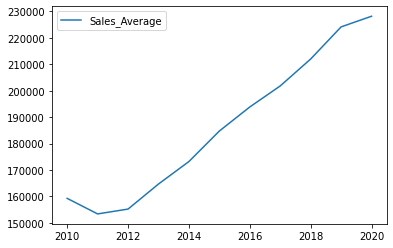

In [62]:
yearly_housing_df.plot()

In [42]:
housing_df["Price"].plot(kind='line', title='Texas Housing Sale Prices'), figsize=(20,10), plt.ylabel('Sale Price')

SyntaxError: cannot assign to function call (<ipython-input-42-6266b097b966>, line 1)

In [29]:
import statsmodels.api as sm

# Applying the Hodrick-Prescott Filter 
ts_noise, ts_trend = sm.tsa.filters.hpfilter(housing_df["Price"])

In [30]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
df = pd.DataFrame(housing_df["Price"])
df["noise"]= ts_noise
df["trend"] = ts_trend
df.head()

,Price,noise,trend
Date,,,
2010-01-31,67653.0,-53895.298086,121548.298086
2010-01-31,89995.0,-38831.621638,128826.621638
2010-01-31,116641.0,-19430.260629,136071.260629
2010-01-31,167849.0,24624.739266,143224.260734
2010-01-31,303323.0,153107.476285,150215.523715


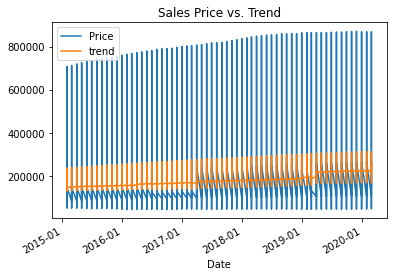

In [31]:
# Plot the Sales Price vs. the Trend for 2015 to the present
ax = df[["Price", "trend"]]["2015-01-31":].plot( title="Sales Price vs. Trend")
# set date format
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.show()

<AxesSubplot:xlabel='Date'>

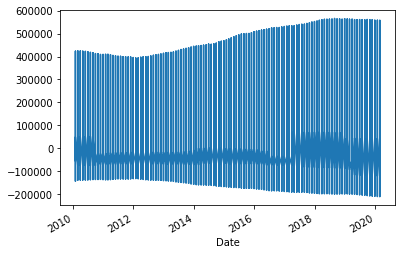

In [32]:
# Plot the Settle Noise
ts_noise.plot()

In [33]:
# Forecasting Returns using an ARMA Model
sales_price = housing_df['Price'].replace(-np.inf, np.nan).dropna()
sales_price.tail()

Date
2020-02-29    240716.0
2020-02-29    230132.0
2020-02-29    281139.0
2020-02-29    141688.0
2020-02-29    264290.0
Name: Price, dtype: float64

In [34]:
from statsmodels.tsa.stattools import adfuller
adfuller(sales_price)

(-16.781192058646212,
 1.2638152515609418e-29,
 34,
 6137,
 {'1%': -3.43141599923769,
  '5%': -2.862011075603187,
  '10%': -2.567020750809108},
 157712.79739517605)

In [35]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
model = ARMA(sales_price.values, order=(2,1))

# Fit the model and assign it to a variable called results

results = model.fit()

In [36]:
# Model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 6172
Model:                     ARMA(2, 1)   Log Likelihood              -80915.529
Method:                       css-mle   S.D. of innovations         119503.167
Date:                Tue, 12 Jan 2021   AIC                         161841.059
Time:                        19:48:25   BIC                         161874.698
Sample:                             0   HQIC                        161852.724
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.856e+05   2155.038     86.127      0.000    1.81e+05     1.9e+05
ar.L1.y       -0.5274      0.014    -38.545      0.000      -0.554      -0.501
ar.L2.y        0.1540      0.013     11.604      0.000       0.128       0.180
ma.L1.y        0.9459      0.005    193.288      0.000       0.936       0.955
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3578           +0.0000j            1.3578            0.5000
AR.2            4.7824           +0.0000j            4.7824            0.0000
MA.1           -1.0572           +0.0000j            1.0572            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'20 Sale Price Forecast'}>

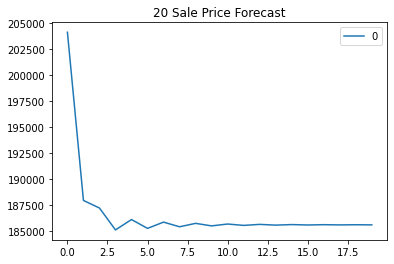

In [39]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(results.forecast(steps=20)[0]).plot(title="20 Sale Price Forecast")